In [1]:
datapath = '/home/spxtr/noblehierarch/data/'

In [2]:
import io
import os.path

import numpy as np
np.seterr(divide='ignore', invalid='ignore')

import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

plt.rcParams['pcolor.shading'] = 'gouraud'

import IPython.display
IPython.display.set_matplotlib_formats('png')

me = 9.10938356E-31
e = 1.602E-19
eps0 = 8.854E-12
h = 6.62607E-34
hbar = 1.054571800E-34
kb = 1.38064852E-23
epsBN = 3 * eps0
epsSiO2 = 4 * eps0

t = 25e-9 # Thickness of hBN in m
C = epsBN / t # Capacitnace in F/m^2

squares = 3

chan_curr = 31
chan_order_xx_r = [0, 1, 2, 3, 4, 5, 6, 7]
chan_order_xx_l = [8, 9, 10, 11, 12, 13, 14, 15]
chan_order_xy   = [16, 17, 18, 19, 20, 22, 23, 24, 25]
channels = {
    0:  '11 - 12',
    1:  '12 - 13',
    2:  '13 - 14',
    3:  '14 - 15',
    4:  '15 - 16',
    5:  '16 - 17',
    6:  '17 - 18',
    7:  '18 - 19',
    8:  '1 - 2',
    9:  '2 - 3',
    10: '3 - 4',
    11: '4 - 5',
    12: '5 - 6',
    13: '6 - 7',
    14: '7 - 8',
    15: '8 - 9',
    16: '11 - 1',
    17: '12 - 2',
    18: '13 - 3',
    19: '14 - 4',
    20: '15 - 5',
    22: '16 - 6',
    23: '17 - 7',
    24: '18 - 8',
    25: '19 - 9',
}

<ipython-input-2-51d97204026d>:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats('png')


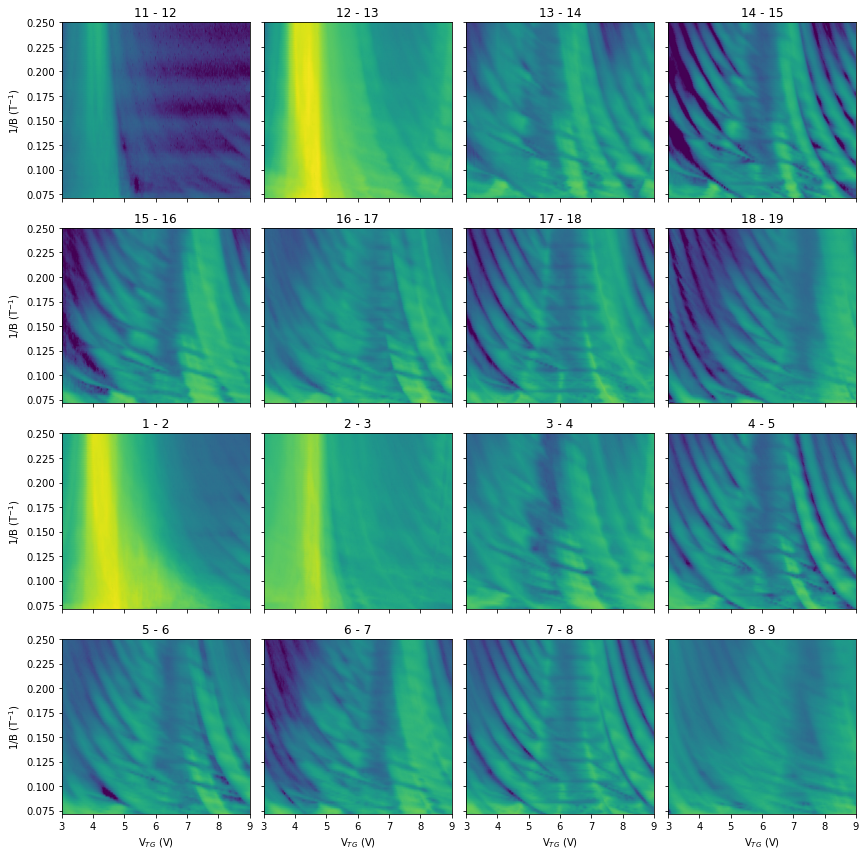

In [3]:
xs = np.linspace(3, 9, 301)
ys = np.linspace(1/14, 1/4, 101)
curr = np.loadtxt(os.path.join(datapath, 'twistangle/fbl_c31_x.dat.gz')).reshape((len(ys), len(xs)))
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12, 12))
for i, chan in enumerate(chan_order_xx_r + chan_order_xx_l):
    zs = np.ma.masked_array(np.loadtxt(os.path.join(datapath, f'twistangle/fbl_c{chan}_x.dat.gz')).reshape((len(ys), len(xs))) / curr / squares, curr < 1e-9)
    axs[i // 4, i % 4].pcolormesh(xs, ys, zs, norm=SymLogNorm(linthresh=0.1, base=10, vmin=10, vmax=2e4), rasterized=True, linewidth=0)
    axs[i // 4, i % 4].set_title(f'{channels[chan]}')
for i in range(4):
    axs[i, 0].set_ylabel('1/B (T$^{-1}$)')
    axs[3, i].set_xlabel('V$_{TG}$ (V)')
plt.tight_layout()
plt.show()

In [4]:
spacings = {
    1: (0.0238, 0.0002),
    2: (0.0224, 0.0003),
    3: (0.0217, 0.0002),
    4: (0.0212, 0.0002),
    5: (0.0209, 0.0002),
    6: (0.0212, 0.0001),
    7: (0.0188, 0.0002),
    9: (0.0233, 0.001),
    10: (0.0218, 0.0004),
    11: (0.0218, 0.0002),
    12: (0.0212, 0.0002),
    13: (0.0208, 0.0004),
    14: (0.0211, 0.00008),
    15: (0.0188, 0.0002)
}
a = 0.246

def calc(spacing):
    # This factor fixes an offset caused by the sample not being in the field center.
    spacing = 0.222 / 0.211 * spacing
    nsat = 4 / (spacing * h / e) / 1e16 # 1e12 cm^-2
    lambdasat = np.sqrt(8 / np.sqrt(3) / nsat / 1e16) * 1e9
    theta = np.arccos((2 * lambdasat**2 - a**2) / (2 * lambdasat**2)) * 180 / np.pi
    return nsat, lambdasat, theta

def calc_err(lo, hi):
    # Not the most precise in the world, but not bad either.
    return np.abs(hi - lo) / 2

for chan, (spacing, err) in spacings.items():
    standard = calc(spacing)
    lo = calc(spacing - err)
    hi = calc(spacing + err)
    nsat, nsat_err = standard[0], calc_err(lo[0], hi[0])
    lsat, lsat_err = standard[1], calc_err(lo[1], hi[1])
    tsat, tsat_err = standard[2], calc_err(lo[2], hi[2])
    print(channels[chan])
    print('n:', nsat, nsat_err)
    print('t:', tsat, tsat_err)
    print()

12 - 13
n: 3.8620599171130454 0.03245657698703752
t: 1.2888777316973419 0.005415920087969317

13 - 14
n: 4.103438661932611 0.05496662708192135
t: 1.3285465074144984 0.008897913043488748

14 - 15
n: 4.23580765102721 0.039043018382622474
t: 1.349805576845479 0.006220920214850323

15 - 16
n: 4.335708774872192 0.040906553639203036
t: 1.3656310777234428 0.006442319392398588

16 - 17
n: 4.397943829056961 0.042089441137115546
t: 1.3753978035409975 0.00658154349511797

17 - 18
n: 4.335708774872192 0.0204519115384576
t: 1.3656310777234428 0.0032210252969703257

18 - 19
n: 4.889203512089918 0.05201869045121077
t: 1.4501860052631765 0.007714712929762113

2 - 3
n: 3.9449367393686905 0.16962303424549408
t: 1.3026340760758686 0.027986957392820644

3 - 4
n: 4.216377340701398 0.07739077715525022
t: 1.3467059911373374 0.012358270484244871

4 - 5
n: 4.216377340701398 0.03868561701485218
t: 1.3467059911373374 0.00617815987399728

5 - 6
n: 4.335708774872192 0.040906553639203036
t: 1.3656310777234428 0.006

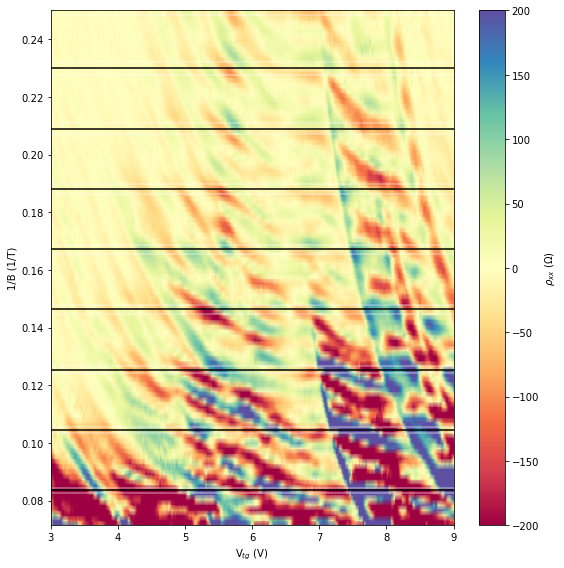

In [5]:
# Adjust this to check each contact pair.
chan = 5

fig = plt.figure(figsize=(8, 8))
zs = np.ma.masked_array(np.loadtxt(os.path.join(datapath, f'twistangle/fbl_c{chan}_x.dat.gz')).reshape((len(ys), len(xs))) / curr / squares, curr < 1e-9)
plt.pcolormesh(xs, ys, np.gradient(zs)[0], cmap='Spectral', vmax=200, vmin=-200, rasterized=True, linewidth=0)
#plt.pcolormesh(xs, ys, zs, rasterized=True, linewidth=0, norm=SymLogNorm(linthresh=0.1, base=1000, vmin=10, vmax=3e3))
plt.ylim(1/14, 1/4)
for i in range(100):
    plt.axhline(i * (spacings[chan][0] + spacings[chan][1]), color='white', alpha=0.4)
    plt.axhline(i * (spacings[chan][0] - spacings[chan][1]), color='white', alpha=0.4)
    plt.axhline(i * spacings[chan][0], color='black', alpha=1)

plt.ylabel('1/B (1/T)')
plt.xlabel('V$_{tg}$ (V)')
plt.colorbar().ax.set_ylabel('$\\rho_{xx}$ (Ω)')
plt.tight_layout()
plt.show()